# Prediciendo las calificaciones de las peliculas

### En este proyecto vamos a escoger que error utilizar para nuestro modelo. Trabajaremos con Clusters y comprobaremos su correlacion. Finalmente, vamos a crear un modelo para realizar nuestras predicciones y ver como se ajustan estas a la realidad.

In [1]:
import pandas as pd
import csv

board_games = pd.read_csv("board_games.csv")
print(board_games.head(3))

       id       type                       name  yearpublished  minplayers  \
0   12333  boardgame          Twilight Struggle         2005.0         2.0   
1  120677  boardgame              Terra Mystica         2012.0         2.0   
2  102794  boardgame  Caverna: The Cave Farmers         2013.0         1.0   

   maxplayers  playingtime  minplaytime  maxplaytime  minage  users_rated  \
0         2.0        180.0        180.0        180.0    13.0        20113   
1         5.0        150.0         60.0        150.0    12.0        14383   
2         7.0        210.0         30.0        210.0    12.0         9262   

   average_rating  bayes_average_rating  total_owners  total_traders  \
0         8.33774               8.22186         26647            372   
1         8.28798               8.14232         16519            132   
2         8.28994               8.06886         12230             99   

   total_wanters  total_wishers  total_comments  total_weights  average_weight  
0       

In [2]:
board_games.shape

(81312, 20)

In [3]:
board_games = board_games.dropna(axis=0)

In [4]:
board_games.shape

(81268, 20)

In [5]:
board_games = board_games[board_games['users_rated'] > 0]

In [6]:
board_games.shape

(56894, 20)

 # Escogiendo el Error metrico
 
 - El error métrico es de suma importancia ya que este nos va a decir si el modelo elegido es adecuado o no, imagenemos que obtenemos un error metrico el cual es igual a la desviación estandar de nuestros datos, eso querra decir que no estamos eligiendo un buen modelo y debemos de cambiarlo, pues deberiamos buscar siempre modelos que nos den un error por debajo de la desviacion estandar y lo mas bajo posible.


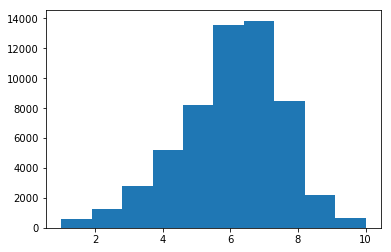

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(board_games['average_rating'])
plt.show()

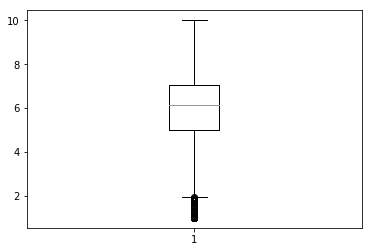

In [8]:
plt.boxplot(board_games['average_rating'])
plt.show()

In [9]:
print(board_games['average_rating'].std())
print(board_games['average_rating'].mean())

1.5788299348332662
6.016112849333889


- Para este caso, en principio elegiremos "Mean Square Error" ya que al ser nuestros datos continuos tiene sentido elegir este error.


- Es importante tener en cuenta que "Mean square error" no es la unica posibilidad que tenemos, puesto que se trata un modelo de Regresion Lineal y queremos medir la distancia entre el valor real y el predecido, podemos usar "mean square" y "la mediana del error medio"


- Definitivamente no podemos usar, AUC "Area bajo la curva" o cualquier otro error de clasificacion ya que este lo usariamos en un problema de clasificacion binaria y este no es el caso.

# Mostrando los "Clusters"

#### Los clusters ni mas ni menos son agrupaciones de datos que presentan unas caracteristicas similares. En este caso vamos a mostrar como sacarlos y despues plotearlos para ver su grafica.

In [10]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters = 5)

numeric_columns = board_games.iloc[:, 3:]
print(numeric_columns.head(3))

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0        14383         8.28798               8.14232   
2        210.0    12.0         9262         8.28994               8.06886   

   total_owners  total_traders  total_wanters  total_wishers  total_comments  \
0         26647            372           1219           5865            5347   
1         16519            132           1586           6277            2526   
2         12230             99           1476           5600            1700   

   total_weights  average_weight  
0           2562          3.4785  
1           1423   

In [11]:
kmeans.fit(numeric_columns)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
labels = kmeans.labels_
print(labels)

[3 3 3 ..., 0 0 0]


In [13]:
game_mean = numeric_columns.apply(np.mean, axis = 1)
game_mean.head()

0    3806.296359
1    2662.195541
2    1979.243229
3    2467.201242
4    6360.675421
dtype: float64

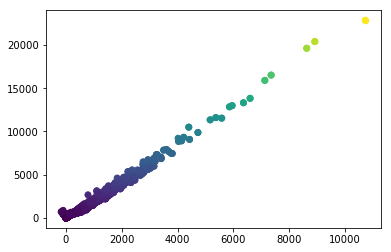

In [14]:
game_std = numeric_columns.apply(np.std, axis = 1)

plt.scatter(x=game_mean, y=game_std, c=game_std)
plt.show()

### Resultados:
    
   #### Podemos ver que hay unos pocos juegos que son jugados por muchos jugadores, mientras que otros muchos son jugados por pocos. La mayoria tienen poco publico.

# Encontrando Correlaciones.

>La correlación es la forma numérica en la que la estadística ha podido evaluar la relación de dos o más variables, es decir, mide la dependencia de una variable con respecto de otra variable independiente.

In [15]:
correlations = numeric_columns.corr()

correlations['average_rating']

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64



- Podemos ver como "average_weight" esta altamente correlacionado con "average_rating", tambien "yearpublished" presenta una buena correlacion lo cual nos da una idea de que los juegos nuevos obtienen mejores ratings. Otro ejemplo es "minage" cuanto mas alto tiene mejor rating.


- Otro insigth que podemos obtener de la correlacion es, ¿Que columnas no estan correlacionadas entre si y por tanto podemos eliminar? En este caso 'bayes_average_rating', 'average_rating' pueden ser eliminadas.

In [16]:
cols_dont_corr = list(numeric_columns.columns)
cols_dont_corr.remove('bayes_average_rating')
cols_dont_corr.remove('average_rating')
# This columns are eliminated because seems that they do not correlate with average_rating

corr_cols = cols_dont_corr


# Creando un Modelo.



- Vamos a crear un Modelo de Regresion linean y hagamos algunos prediciones sobre los datos dados.

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(board_games[corr_cols], board_games['average_rating'])
predictions = lr.predict(board_games[corr_cols])

mse = np.mean((predictions - board_games['average_rating']) ** 2)

In [18]:
print(mse)

2.093396975833943



- Nuestro Error aqui podemos ver que es muy similar a nuestra desviacion estandar, esto quiere decir como ya adelantamos que deberiamos de escoger otro modelo pues este no nos esta dando nueva informacion, o aportando valor a las predicciones.